In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [112]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [113]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [114]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [115]:
#dropping unnecessary columns
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [116]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
#renaming columns 
df.rename(columns = {"v1":"target","v2":"sms"},inplace = True)

In [118]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
df.isnull().sum()

target    0
sms       0
dtype: int64

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [121]:
df["target"] = le.fit_transform(df["target"])

In [122]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
df.duplicated().sum()

403

In [124]:
df = df.drop_duplicates(keep = "first")

In [125]:
df.duplicated().sum()

0

## Analysis

In [126]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

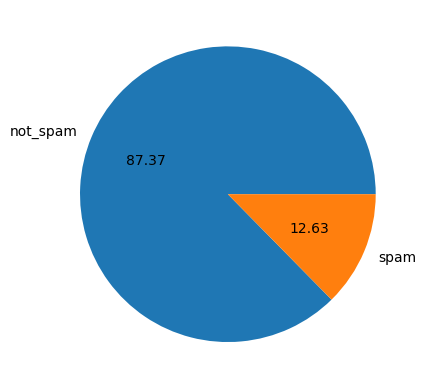

In [127]:
plt.pie(df["target"].value_counts(),labels = ["not_spam","spam"],autopct = "%0.2f")
plt.show()

In [128]:
import nltk

In [129]:
len(df["sms"][0])

111

In [130]:
df["char"]=df["sms"].apply(len)

In [131]:
#df.drop(columns = ["words"],inplace = True)

In [132]:
df.head()

,target,sms,char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [133]:
df["word"]=df["sms"].apply(lambda x:len(nltk.word_tokenize(x)))

In [134]:
df.head()

,target,sms,char,word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [135]:
df["sen"]=df["sms"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [136]:
df.head()

,target,sms,char,word,sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [137]:
df[["char","word","sen"]].describe()

,char,word,sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [138]:
df[df["target"]==1][["char","word","sen"]].describe()

,char,word,sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [139]:
df[df["target"]==0][["char","word","sen"]].describe()

,char,word,sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='char', ylabel='Count'>

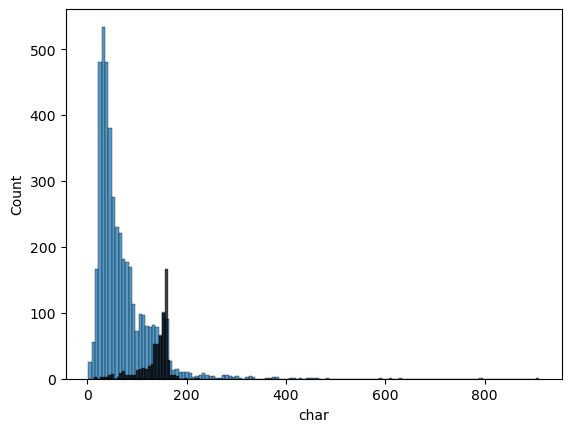

In [140]:
sns.histplot(df[df["target"]==0]["char"])
sns.histplot(df[df["target"]==1]["char"],color = "black")


<Axes: xlabel='word', ylabel='Count'>

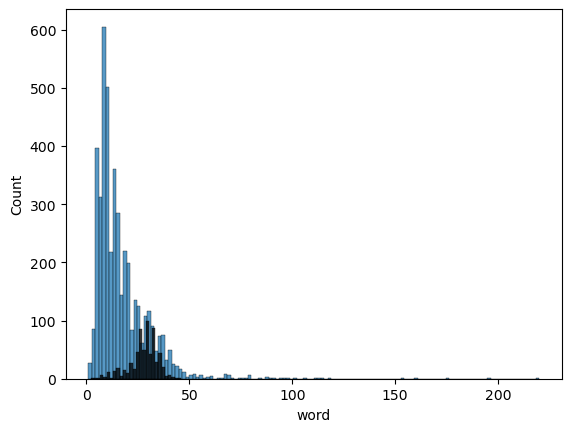

In [141]:
sns.histplot(df[df["target"]==0]["word"])
sns.histplot(df[df["target"]==1]["word"],color = "black")

<Axes: xlabel='sen', ylabel='Count'>

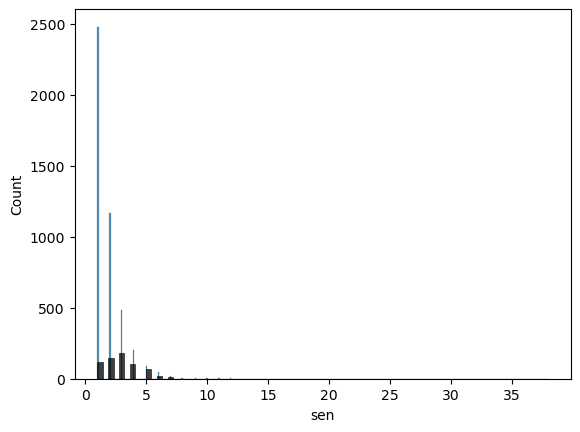

In [142]:
sns.histplot(df[df["target"]==0]["sen"])
sns.histplot(df[df["target"]==1]["sen"],color = "black")

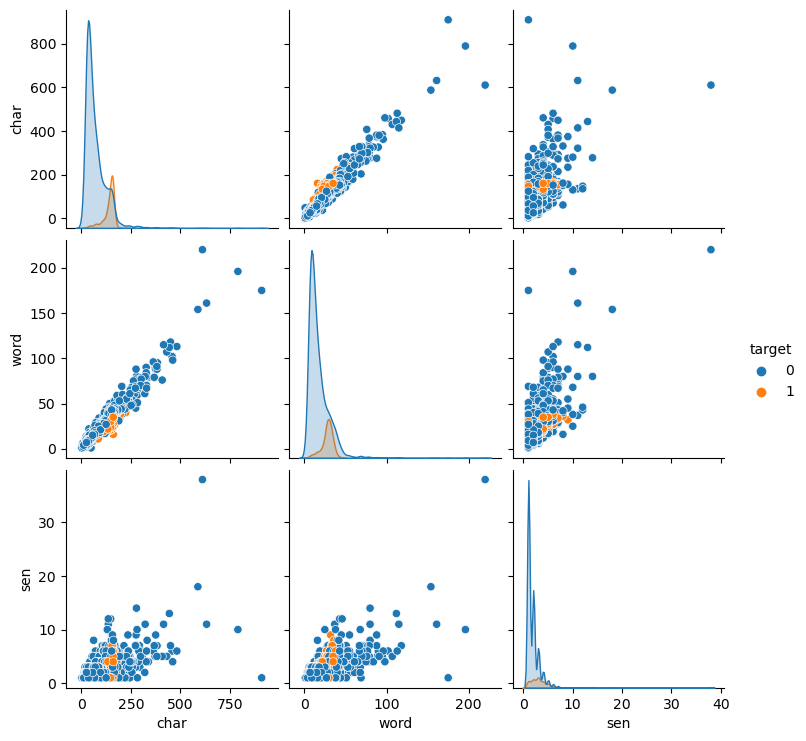

In [143]:
sns.pairplot(df,hue = "target")

C:\Users\USER\AppData\Local\Temp\ipykernel_16328\3193404789.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot  = True)


<Axes: >

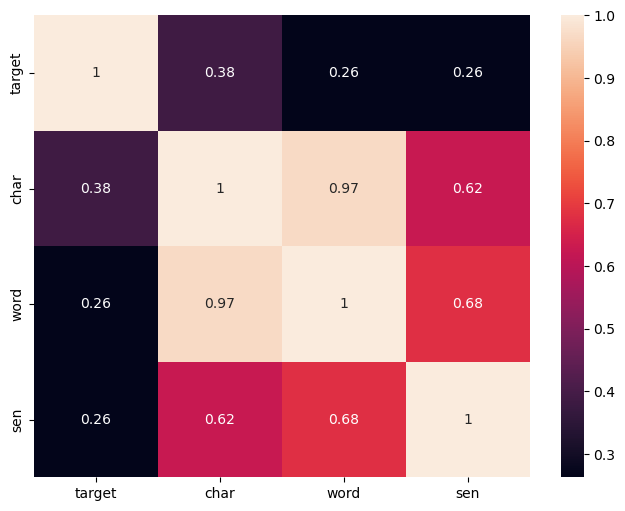

In [144]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot  = True)

## preprocessing

In [145]:
#lower_case
df["sms"]=df["sms"].str.lower()

In [146]:
df.head()

,target,sms,char,word,sen
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [147]:
#tokenization
df["sms"]=df["sms"].apply(lambda x:nltk.word_tokenize(x))

In [148]:
df.head()

,target,sms,char,word,sen
0,0,"[go, until, jurong, point, ,, crazy, .., avail...",111,24,2
1,0,"[ok, lar, ..., joking, wif, u, oni, ...]",29,8,2
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155,37,2
3,0,"[u, dun, say, so, early, hor, ..., u, c, alrea...",49,13,1
4,0,"[nah, i, do, n't, think, he, goes, to, usf, ,,...",61,15,1


In [149]:
def only_isal(text):
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    text = l
    return text
    


In [150]:
df["sms"] = df["sms"].apply(only_isal)

In [151]:
df["sms"]=df["sms"].apply(lambda x:" ".join(x))

In [152]:
df.head()

,target,sms,char,word,sen
0,0,go until jurong point crazy available only in ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor u c already then say,49,13,1
4,0,nah i do think he goes to usf he lives around ...,61,15,1


## riddance from stopwords and pupnctuation

In [153]:
## punctuation

import string

exclude  = string.punctuation

In [154]:
def remove_punc(text):
    return text.translate(str.maketrans("","",exclude))

In [155]:
df["sms"].apply(remove_punc)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i do think he goes to usf he lives around ...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                    will b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i b...
5571                            rofl its true to its name
Name: sms, Length: 5169, dtype: object

In [156]:
##stop_words
from nltk.corpus import stopwords

In [157]:
def remove_stop(text):
    sl = []
    for i in text.split():
        if i not in stopwords.words("english"):
            sl.append(i)
    return " ".join(sl)

In [158]:
remove_stop(df["sms"][0])

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [159]:
df["sms"].apply(remove_stop)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u pound prize 2 claim...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: sms, Length: 5169, dtype: object

In [160]:
df["sms"]=df["sms"].apply(remove_stop)

In [161]:
df.head()

,target,sms,char,word,sen
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah think goes usf lives around though,61,15,1


In [162]:
#!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [163]:
spam = wc.generate(df[df["target"]==0]["sms"].str.cat(sep = " "))

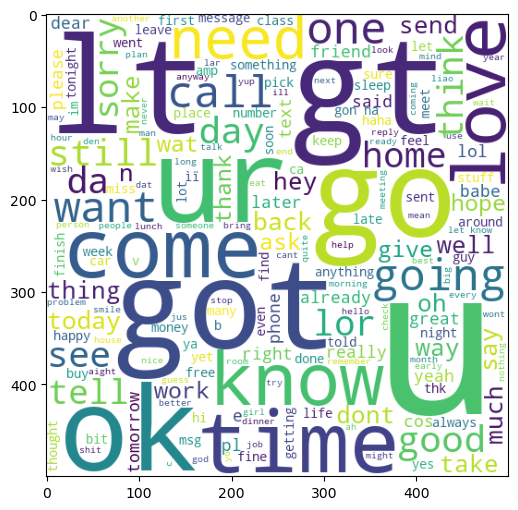

In [164]:
plt.figure(figsize=(10,6))
plt.imshow(spam)

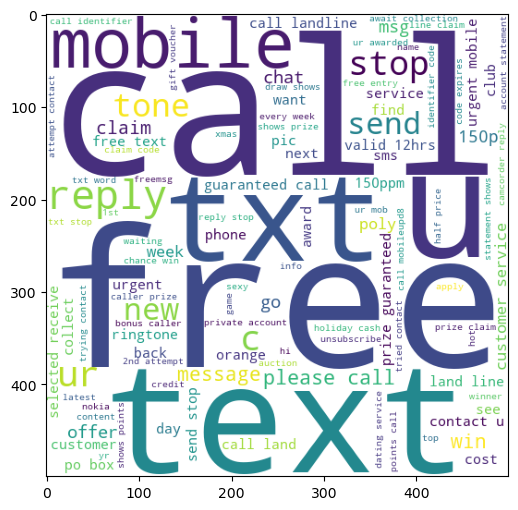

In [165]:
spam = wc.generate(df[df["target"]==1]["sms"].str.cat(sep = " "))
plt.figure(figsize=(10,6))
plt.imshow(spam)

In [166]:
spam_repo = []
for i in df[df["target"]==1]["sms"]:
    for j in i.split():
        spam_repo.append(j)
len(spam_repo)

9939

In [167]:
from collections import Counter
count_df=pd.DataFrame(Counter(spam_repo).most_common(30),columns = ["word_to_c","count"])

In [168]:
count_df.head()

,word_to_c,count
0,call,302
1,free,191
2,2,155
3,txt,130
4,u,119


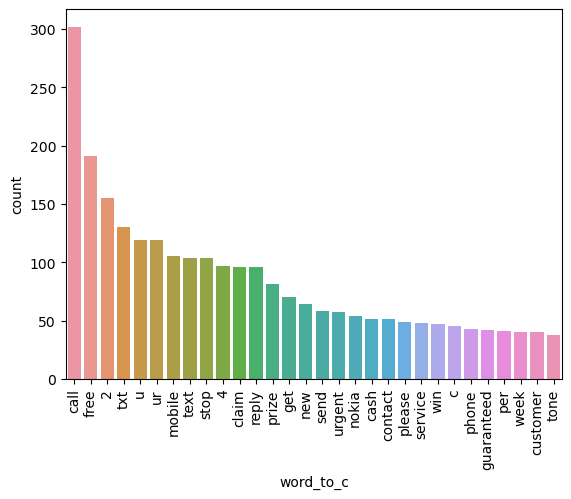

In [169]:
sns.barplot(count_df,x = "word_to_c",y="count")
plt.xticks(rotation ="vertical")
plt.show()

In [170]:
not_spam_repo = []
for i in df[df["target"]==0]["sms"]:
    for j in i.split():
        not_spam_repo.append(j)
len(not_spam_repo)

35404

In [171]:
from collections import Counter
count_df2=pd.DataFrame(Counter(not_spam_repo).most_common(30),columns = ["word_to_c","count"])

In [172]:
count_df2.head()

,word_to_c,count
0,u,883
1,get,293
2,gt,288
3,lt,287
4,2,284


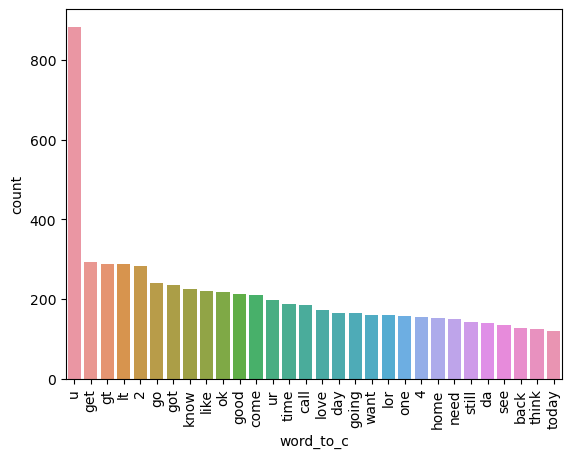

In [173]:
sns.barplot(count_df2,x = "word_to_c",y="count")
plt.xticks(rotation ="vertical")
plt.show()

## Modelling

In [200]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [201]:
x = tfidf.fit_transform(df["sms"]).toarray()

In [202]:
x.shape

(5169, 3000)

In [203]:
y= df["target"]

In [204]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 34)

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [206]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [207]:
gn = GaussianNB()


In [208]:
gn.fit(x_train,y_train)

GaussianNB()

In [209]:
y_pred=gn.predict(x_test)

In [210]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8771760154738878
0.5173913043478261
[[788 111]
 [ 16 119]]


In [218]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [219]:
for i in [gn,mnb,bnb]:
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    print(f"performance of {i}")
    print("accuracy:",accuracy_score(y_test,y_pred))
    print("precision:",precision_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print("***************************************")

performance of GaussianNB()
accuracy: 0.8771760154738878
precision: 0.5173913043478261
[[788 111]
 [ 16 119]]
***************************************
performance of MultinomialNB()
accuracy: 0.97678916827853
precision: 1.0
[[899   0]
 [ 24 111]]
***************************************
performance of BernoulliNB()
accuracy: 0.9825918762088974
precision: 0.9915966386554622
[[898   1]
 [ 17 118]]
***************************************


In [213]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)

In [214]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    #'BgC': bc, 
    #'ETC': etc,
    'GBDT':gbdt
    #'xgb':xgb
}

In [215]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [216]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9700193423597679
Precision -  0.9482758620689655
For  KN
Accuracy -  0.902321083172147
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.9054054054054054
For  LR
Accuracy -  0.9477756286266924
Precision -  0.9354838709677419
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9908256880733946
For  AdaBoost
Accuracy -  0.9584139264990329
Precision -  0.9693877551020408
For  GBDT
Accuracy -  0.9429400386847195
Precision -  0.9318181818181818


In [220]:
accuracy_scores

[0.9700193423597679,
 0.902321083172147,
 0.97678916827853,
 0.9274661508704062,
 0.9477756286266924,
 0.9729206963249516,
 0.9584139264990329,
 0.9429400386847195]

In [221]:
precision_scores

[0.9482758620689655,
 1.0,
 1.0,
 0.9054054054054054,
 0.9354838709677419,
 0.9908256880733946,
 0.9693877551020408,
 0.9318181818181818]

In [222]:
model_comparison_df = pd.DataFrame({"algo":clfs.keys(),"accuracy_tfid":accuracy_scores,"precision_tfid":precision_scores})

In [223]:
model_comparison_df.sort_values(by = "precision_tfid",ascending = False)

,algo,accuracy_tfid,precision_tfid
1,KN,0.902321,1.000000
2,NB,0.976789,1.000000
5,RF,0.972921,0.990826
6,AdaBoost,0.958414,0.969388
0,SVC,0.970019,0.948276
4,LR,0.947776,0.935484
7,GBDT,0.942940,0.931818
3,DT,0.927466,0.905405


In [224]:
from sklearn.ensemble import VotingClassifier

In [225]:
voting = VotingClassifier(estimators=[('nb', mnb), ('rf', rfc), ("adaboost",abc)],voting='soft')

In [226]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('adaboost', AdaBoostClassifier(random_state=2))],
                 voting='soft')

In [227]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 1.0


In [229]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

0